# import modules

In [21]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data

In [27]:
test_unknown_data_path = './data/2_rf_test_unknown_data.csv'
test_unknown_data = pd.read_csv(test_unknown_data_path)

test_unknown_label_path = './data/2_rf_test_unknown_label.csv'
test_unknown_label = pd.read_csv(test_unknown_label_path)

print("test_unknown_data shape:", test_unknown_data.shape)
print("test_unknown_data shape:", test_unknown_data.columns)


test_unknown_data shape: (5728, 46)
test_unknown_data shape: Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')


In [31]:
knn_clf_26 = KNeighborsClassifier(n_neighbors=30)
knn_clf_20 = KNeighborsClassifier(n_neighbors=22)
knn_clf_15 = KNeighborsClassifier(n_neighbors=17)
knn_clf_10 = KNeighborsClassifier(n_neighbors=12)
knn_clf_5 = KNeighborsClassifier(n_neighbors=3)

In [32]:
knn_list = []
knn_list.append(knn_clf_33)
knn_list.append(knn_clf_22)
knn_list.append(knn_clf_17)
knn_list.append(knn_clf_12)
knn_list.append(knn_clf_3)

# KNN WORKING CODE BELOW
<
<style>
td,th {
  font-size: 15px
}
</style>

In [33]:
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Suppress all warnings
warnings.filterwarnings("ignore")

# Assuming test_unknown_data is your test data
# Drop the 'label' column from test_unknown_data
#test_unknown_data = test_unknown_data.drop('label', axis=1)

# Apply label encoding separately to each column in test_unknown_label
label_encoder = LabelEncoder()
test_unknown_label_encoded = test_unknown_label.apply(lambda col: label_encoder.fit_transform(col))

# Train the kNN classifier on your training data
# Use the appropriate labels from your dataset; I'm using the first column as an example
knn_clf = KNeighborsClassifier(n_neighbors=5)
# Assuming your_training_data and your_training_labels are your original training data and labels
knn_clf.fit(test_unknown_data, test_unknown_label.values.ravel())  

# Make predictions on the test data
predictions = knn_clf.predict(test_unknown_data)

# Optionally, you can evaluate the performance of the classifier
# Assuming y_true is the actual labels for evaluation
accuracy = accuracy_score(test_unknown_label_encoded, predictions)
print(f'Accuracy for kNN with {knn_clf.n_neighbors} neighbors: {accuracy}')

# Loop through each kNN classifier in knn_list
for knn_clf in knn_list:
    # Train the kNN classifier on your training data
    knn_clf.fit(test_unknown_data, test_unknown_label.values.ravel()) 

    # Make predictions on the test data
    predictions = knn_clf.predict(test_unknown_data)

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(test_unknown_label.values.ravel(), predictions)
    
    # Print the accuracy for each kNN classifier
    print(f'Accuracy for kNN with {knn_clf.n_neighbors} neighbors: {accuracy}')


Accuracy for kNN with 5 neighbors: 0.0
Accuracy for kNN with 30 neighbors: 0.8854748603351955
Accuracy for kNN with 22 neighbors: 0.8854748603351955
Accuracy for kNN with 17 neighbors: 0.888268156424581
Accuracy for kNN with 12 neighbors: 0.8898393854748603
Accuracy for kNN with 3 neighbors: 0.9025837988826816


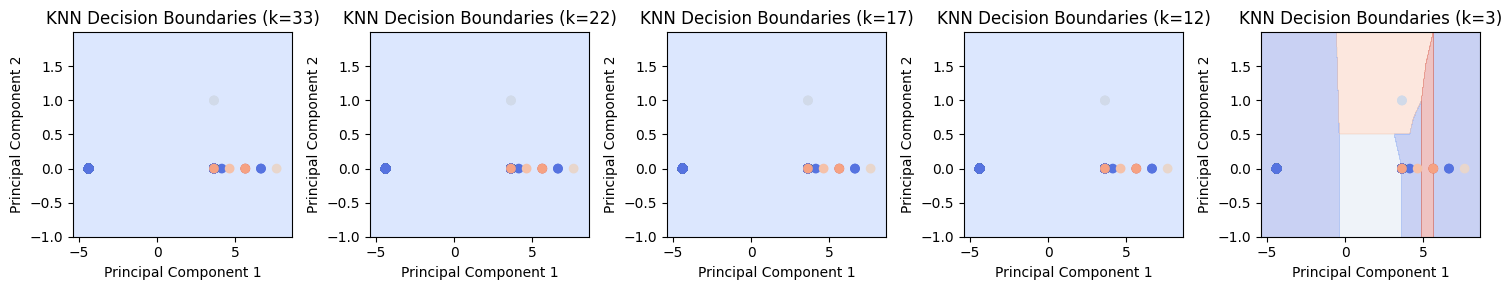

In [35]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Load test data and labels
test_unknown_data_path = './data/2_rf_test_unknown_data.csv'
test_unknown_label_path = './data/2_rf_test_unknown_label.csv'

test_unknown_data = pd.read_csv(test_unknown_data_path)
test_unknown_label = pd.read_csv(test_unknown_label_path)['label']

# Apply label encoding to the labels
label_encoder = LabelEncoder()
test_unknown_label_encoded = label_encoder.fit_transform(test_unknown_label)

# Assuming knn_list is a list of KNN models with different k values
#knn_list = [KNeighborsClassifier(n_neighbors=k) for k in [26, 20, 15, 10, 5]]

# Specify the number of features to select
k_best = 2  

# Remove features with low variance
#selector = VarianceThreshold()
#test_unknown_data_filtered = selector.fit_transform(test_unknown_data)

# Apply SelectKBest with ANOVA F-statistic as the scoring function
selector = SelectKBest(f_classif, k=k_best)
selected_data = selector.fit_transform(test_unknown_data, test_unknown_label_encoded)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(selected_data)

#downsampled_size = 5000 
#indices = np.random.choice(len(reduced_data), downsampled_size, replace=False) 
#downsampled_data = reduced_data[indices]
#downsampled_labels = test_unknown_label.iloc[indices]

def plot_decision_boundary(knn, X, y, title, ax):
    h = .02  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain predictions for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)
# Set up subplots
fig, axes = plt.subplots(1, len(knn_list), figsize=(15, 3))  # Adjust figsize as needed
# Assuming downsampled_labels is defined somewhere in your code
for i, (knn, k) in enumerate(zip(knn_list, [33, 22, 17, 12, 3])):
    # Fit KNN on the downsampled data
    knn.fit(reduced_data, test_unknown_label_encoded)
    plot_decision_boundary(knn, reduced_data, test_unknown_label_encoded, f'KNN Decision Boundaries (k={k})', axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['BenignTraffic', 'BenignTraffic', 'BenignTraffic', ...,
       'BenignTraffic', 'BenignTraffic', 'BenignTraffic'], dtype=object)

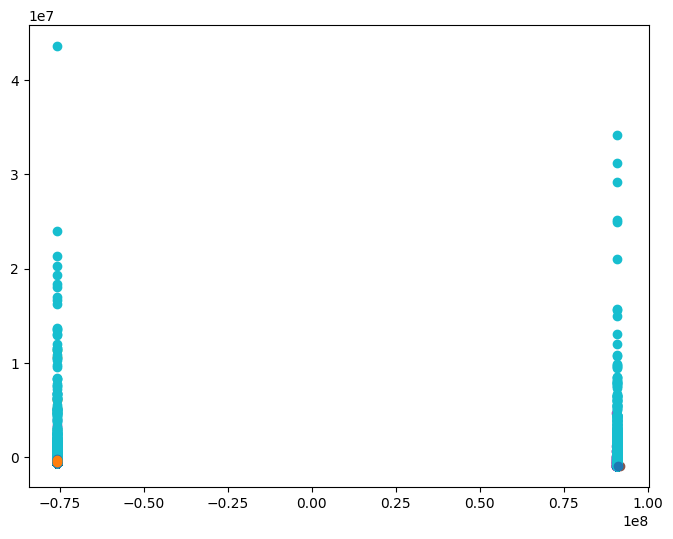

In [17]:
# Scatter plot for visualization
plt.figure(figsize=(8, 6))

# Assuming your_data is the original data for which you are making predictions
# If your_data is more than 2-dimensional, apply PCA for dimensionality reduction
pca = PCA(n_components=2)
your_data_reduced = pca.fit_transform(test_unknown_data)

# Scatter plot for actual labels
for class_label in set(test_unknown_label.values.ravel()):
    plt.scatter(your_data_reduced[test_unknown_label.values.ravel() == class_label, 0],
                your_data_reduced[test_unknown_label.values.ravel() == class_label, 1],
                label=f'Actual Class {class_label}', marker='o')

# Scatter plot for predicted labels
plt.scatter(your_data_reduced[:, 0], your_data_reduced[:, 1], c=predictions, cmap='viridis',
            marker='x', label='Predicted Labels')

plt.title('Actual and Predicted Clusters Visualized')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

MemoryError: Unable to allocate 62.0 GiB for an array with shape (8326872253,) and data type float64

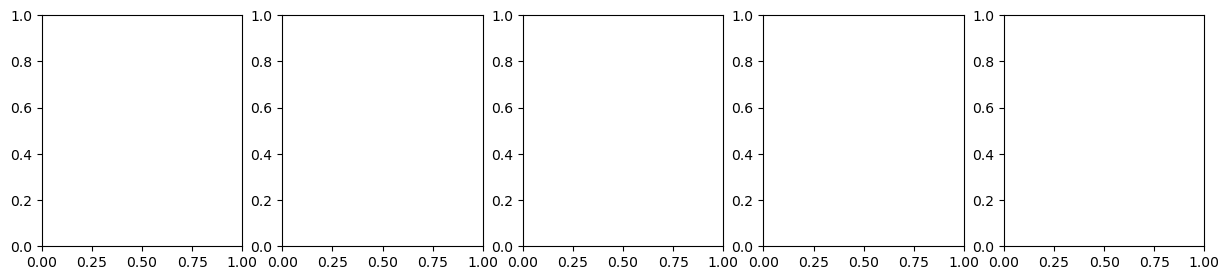

In [319]:
# NOT WORKING
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Only needed if you're still using Pandas for reading data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Load the data
test_unknown_data_path = './data/test_unknown_data.csv'
test_unknown_label_path = './data/test_unknown_label.csv'

# If you're still using Pandas for loading data:
test_unknown_data = pd.read_csv(test_unknown_data_path).to_numpy()
test_unknown_label = pd.read_csv(test_unknown_label_path)
test_unknown_label= test_unknown_label.values.ravel()
#test_unknown_label = pd.read_csv(test_unknown_label_path)['your_label_column_name'].to_numpy()

# If your data is already in NumPy arrays, just use them directly:
# test_unknown_data = np.load('your_data.npy')
# test_unknown_label = np.load('your_label.npy')

# Function to plot decision boundaries for KNN classifiers
def plot_decision_boundary(knn, X, y, title, ax):
    h = .02  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain predictions for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Additional downsampling
downsampled_size = 100
indices = np.random.choice(len(test_unknown_data), downsampled_size, replace=False)
downsampled_data = test_unknown_data[indices]
downsampled_labels = test_unknown_label[indices]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(downsampled_data)

# Set up subplots
fig, axes = plt.subplots(1, len(knn_list), figsize=(15, 3))  # Adjust figsize as needed

# Assuming knn_list is a list of fitted KNN models
for i, (knn, k) in enumerate(zip(knn_list, [26, 20, 15, 10, 5])):
    # Fit KNN on the downsampled data
    knn.fit(reduced_data, downsampled_labels)
    plot_decision_boundary(knn, reduced_data, downsampled_labels, f'KNN Decision Boundaries (k={k})', axes[i])

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()


In [ ]:
test_unknown_label= test_unknown_label.values.ravel()
print(type(test_unknown_label))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
print(test_unknown_label.shape)

(5990,)


In [ ]:
for knn in knn_list:
    knn.fit(test_unknown_data, test_unknown_label)

# plot

MemoryError: Unable to allocate 62.1 GiB for an array with shape (8332938573,) and data type float64

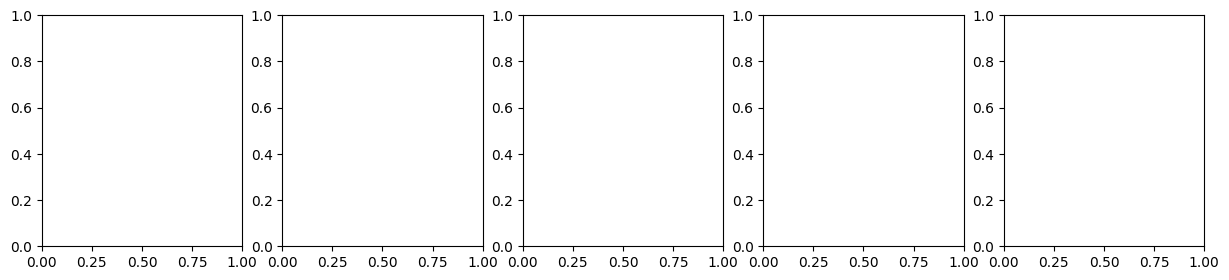

In [ ]:
#YET TO DO ----> CHECK AARVINDA

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Function to plot decision boundaries for KNN classifiers
def plot_decision_boundary(knn, X, y, title, ax):
    h = .02  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain predictions for each point in the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

# Additional downsampling
downsampled_size = 1000
indices = np.random.choice(len(test_unknown_data), downsampled_size, replace=False)
downsampled_data = test_unknown_data[indices]
downsampled_labels = test_unknown_label[indices]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(downsampled_data)

# Set up subplots
fig, axes = plt.subplots(1, len(knn_list), figsize=(15, 3))  # Adjust figsize as needed

# Assuming knn_list is a list of fitted KNN models
for i, (knn, k) in enumerate(zip(knn_list, [26, 20, 15, 10, 5])):
    plot_decision_boundary(knn, reduced_data, downsampled_labels, f'KNN Decision Boundaries (k={k})', axes[i])

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()
